**🏡 House Price Prediction using Linear Regression**
# Internship Task 1 - Machine Learning

📊 Shape of dataset: (20640, 10)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


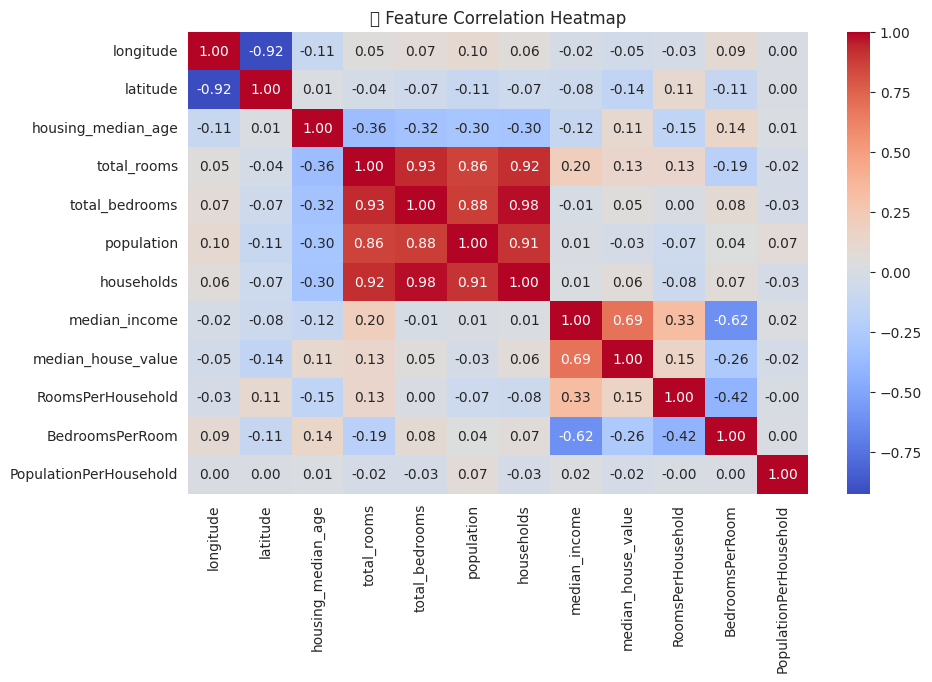


📊 Model Performance Comparison:
                        RMSE       MAE        R²  CrossVal R²
Linear Regression  0.408728  0.313756  0.499109     0.496871
Ridge Regression   0.408729  0.313760  0.499108     0.496872
Lasso Regression   0.409813  0.316382  0.496448     0.494349


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


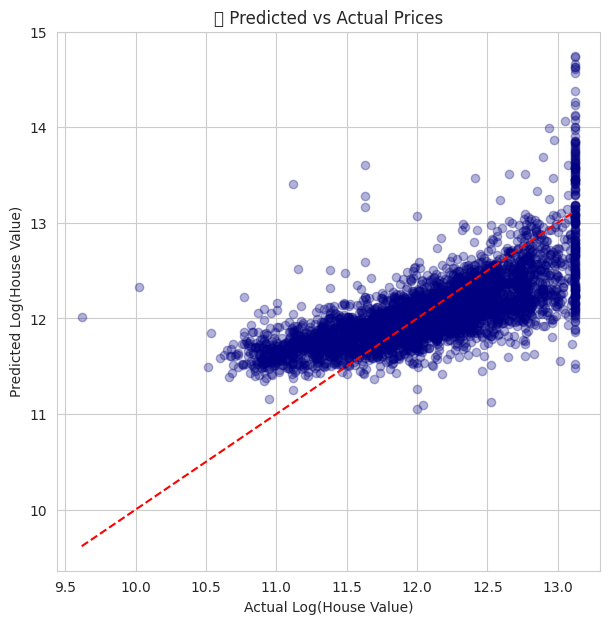

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


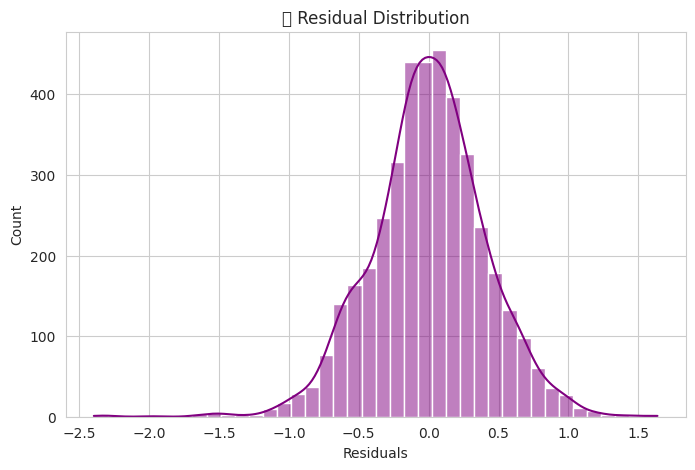


🔑 Feature Importance (Linear Regression):

                  Feature  Coefficient
0           median_income     0.472747
3         BedroomsPerRoom     0.140863
1      housing_median_age     0.079530
4  PopulationPerHousehold    -0.024047
2       RoomsPerHousehold    -0.008443


In [11]:

# ================================================================
# Objective:
# Implement and analyze a Linear Regression model to predict house prices based on features such as square footage, bedrooms, bathrooms and engineered features from the California Housing dataset.
# ================================================================


# ===============================
# 1. Import Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# ===============================
# 2. Load Dataset
# ===============================
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

print("📊 Shape of dataset:", df.shape)
df.head()

# Caption: This dataset contains information such as location, income,
# housing age, number of rooms/bedrooms, population, and median house value.


# ===============================
# 3. Feature Engineering
# ===============================
df["RoomsPerHousehold"] = df["total_rooms"] / df["households"]
df["BedroomsPerRoom"] = df["total_bedrooms"] / df["total_rooms"]
df["PopulationPerHousehold"] = df["population"] / df["households"]

df.dropna(inplace=True)


# ===============================
# 4. Correlation Analysis
# ===============================
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔎 Feature Correlation Heatmap")
plt.show()

# Caption: The heatmap helps identify which features have the strongest
# correlation with house prices. Median income shows the highest correlation.


# ===============================
# 5. Define Features & Target
# ===============================
X = df[["median_income", "housing_median_age",
        "RoomsPerHousehold", "BedroomsPerRoom", "PopulationPerHousehold"]]

y = np.log1p(df["median_house_value"])   # log-transform target

# ===============================
# 6. Train-Test Split & Scaling
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ===============================
# 7. Train Models
# ===============================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "CrossVal R²": cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    }

# ===============================
# 8. Print Model Comparison
# ===============================
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance Comparison:\n", results_df)

# Caption: The comparison shows how Linear, Ridge, and Lasso regressions
# perform. Ridge/Lasso add regularization, which may slightly improve stability.


# ===============================
# 9. Visualization - Predicted vs Actual
# ===============================
best_model = models["Linear Regression"]
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_best, alpha=0.3, color="navy")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Log(House Value)")
plt.ylabel("Predicted Log(House Value)")
plt.title("📈 Predicted vs Actual Prices")
plt.show()

# Caption: Points closer to the red dashed line indicate better predictions.
# A perfect model would have all points lying on the line.


# ===============================
# 10. Visualization - Residuals
# ===============================
residuals = y_test - y_pred_best
sns.histplot(residuals, bins=40, kde=True, color="purple")
plt.title("📉 Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# Caption: Residuals are centered around zero, indicating the model does not
# show strong bias. The bell-shaped curve suggests errors are normally distributed.


# ===============================
# 11. Feature Importance
# ===============================
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": best_model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\n🔑 Feature Importance (Linear Regression):\n")
print(coef_df)

# Caption: Positive coefficients increase house price, while negative ones
# decrease it. Median income is the strongest predictor.

**Conclusion**

The Linear Regression model predicts house prices effectively using key features and engineered ratios. Residuals are centered around zero, showing minimal bias, and regularization stabilizes coefficients.